# <center> **Credit Scoring Model**


## <font color=green> Understanding the business issue.

When a bank lends money to an individual, it takes the risk that the individual may not repay the money within the agreed upon timeframe. This risk is called **Credit Risk**. Therefore, before granting a loan, banks verify whether the client requesting the loan will be able to repay it or not. This verification is done through the analysis of several parameters such as income, assets, current expenses of the client, etc. This analysis is still manually performed by several banks, thus consuming a lot of time and financial resources.

Using **Machine Learning**, it is possible to automate this task and accurately predict clients who will default on payments.

In this project, we will build an algorithm capable of predicting whether a person will default on payments or not (1: default, 0: non-default). This is  a classification problem because we want to predict a discrete variable (binary to be precise).


# Importing Libraries


In [68]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #dataviz
import seaborn as sns  #dataviz


import plotly.express as ex
import plotly.graph_objs as go
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

About dataset, it involves information collected on previous clients who have taken out loans, which is used to predict the behavior of new clients.

Two types of data can be used to model the probability of default:

- **Credit application data**;
- **Behavioral data describing the loan recipient**.

In practice, banks use a mixture of these two types of data to build their **scoring model** applied to credit risk management.

## Data Loading

In [69]:
raw_data = pd.read_csv('credit_risk.csv')
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [70]:
raw_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [71]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The dataset consists of 12 variables and 32581 historical observations (rows). Each observation corresponds to a person who has taken out a loan. We have variables describing the loan (amount, status, interest rate, etc.) and other variables describing the person who took out the loan (age, income, etc.). Therefore, we will use this historical data to build the scoring model that will predict the status of new credit applicants.

* **person_age**:  indicating the age of the person;
* **person_income**:  indicating the annual income (or salary) of the person;
* **person_home_ownership**: indicating the person's homeownership status (owner, renter, etc.);
* **person_emp_length**:  indicating the duration (in months) since the person has been employed;
* **loan_intent**:  indicating the purpose of the loan;
* **loan_grade**: Creditworthiness rating of the customer. Classes from A to G with A indicating the highest creditworthiness class and G the lowest;
* **loan_amnt**:  indicating the loan amount;
* **loan_int_rate**:  indicating the interest rate of the loan;
* **loan_status**:  the target variable. It indicates whether the person is in default (1) or not (0);
* **loan_percent_income**:  indicating the percentage of the loan compared to income (debt/income ratio);
* **cb_person_default_on_file**:  indicating if the person has defaulted on payment in the past;
* **cb_person_cred_hist_length**: indicating the length of credit history.


# EDA

In [72]:
raw_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [73]:
raw_data.isna().sum()/raw_data.shape[0]

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

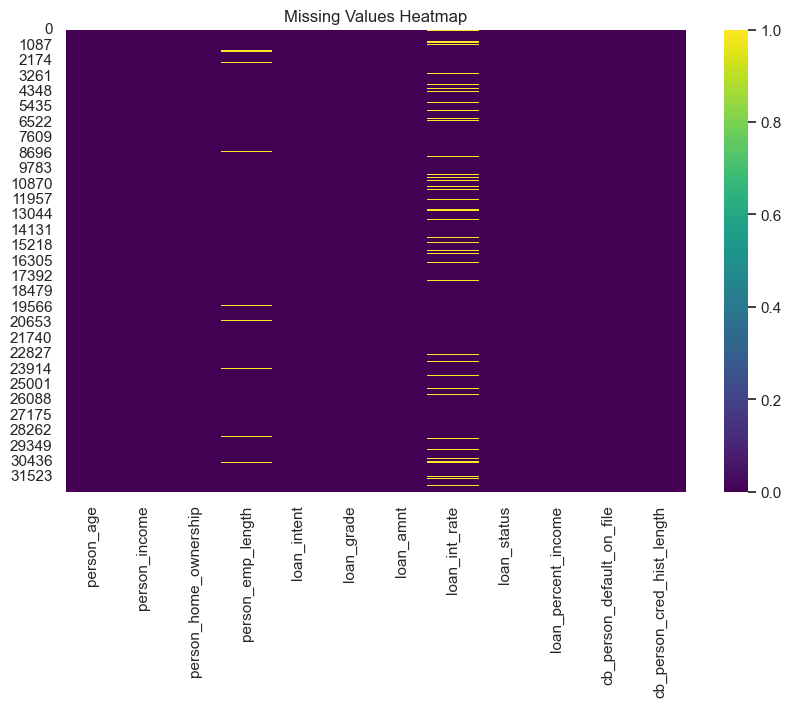

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

- We notice that the means and standard deviations vary greatly from one variable to another. This indicates that the data are not on the same scale. It will probably be necessary to normalize the data before modeling them. 

- There are missing values in the variables **person_emp_length** and **loan_int_rate**. These two variables likely contain outliers due to the very large difference between their 3rd quartile and their maximum. Outliers are values that are very distant from the other values and are therefore not representative of the entire dataset. They can cause significant modeling errors.


## Target

In [75]:
raw_data['loan_status'].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [76]:
raw_data['loan_status'].value_counts()/raw_data.shape[0]

loan_status
0    0.781836
1    0.218164
Name: count, dtype: float64

These results show a significant class imbalance in the data. Indeed, only about 22% of clients are in default, while a little over 78% are good clients.

Class imbalance is often observed in credit data. The majority of credit applicants are incentivized to not default on payments because the more they repay the credit on time, the higher their credit scores increase, allowing them to borrow again for other investments.


In the data preparation phase for modeling, it will be necessary to address this issue.


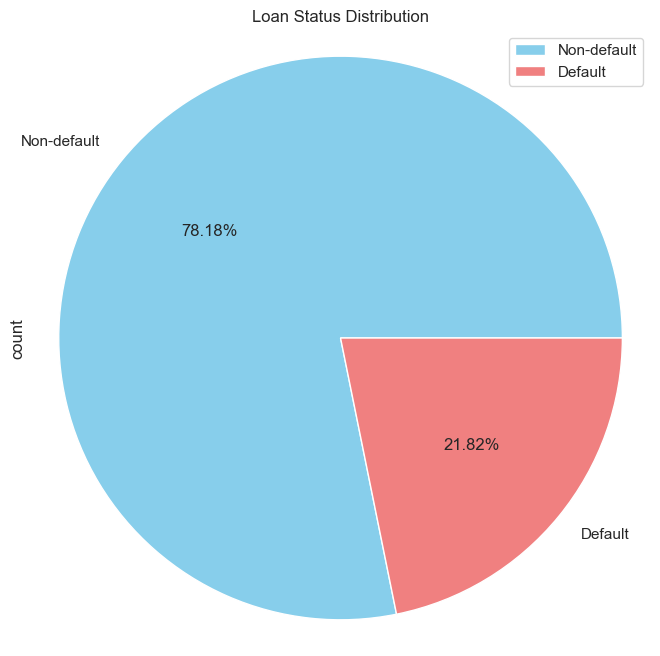

In [77]:

# Generate the pie plot
plt.figure(figsize=(8, 8))
raw_data['loan_status'].value_counts().plot.pie(autopct='%1.2f%%', labels=['Non-default', 'Default'], colors=['skyblue', 'lightcoral'])

# Add title and legend
plt.title('Loan Status Distribution')
plt.legend(loc="best")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

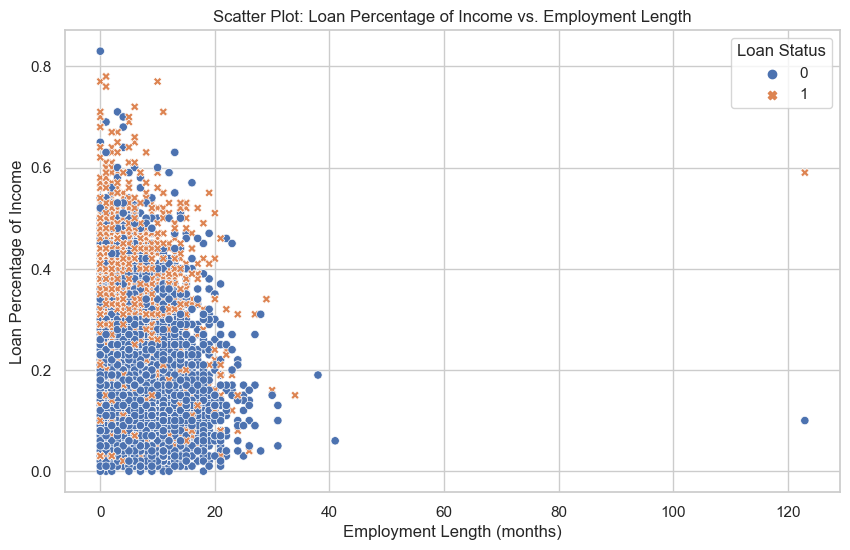

In [78]:
#Scatter Plot: Loan Percentage of Income vs. Employment Length
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_data, x='person_emp_length', y='loan_percent_income', hue='loan_status', style='loan_status')
plt.title('Scatter Plot: Loan Percentage of Income vs. Employment Length')
plt.xlabel('Employment Length (months)')
plt.ylabel('Loan Percentage of Income')
plt.legend(title='Loan Status')
plt.show()

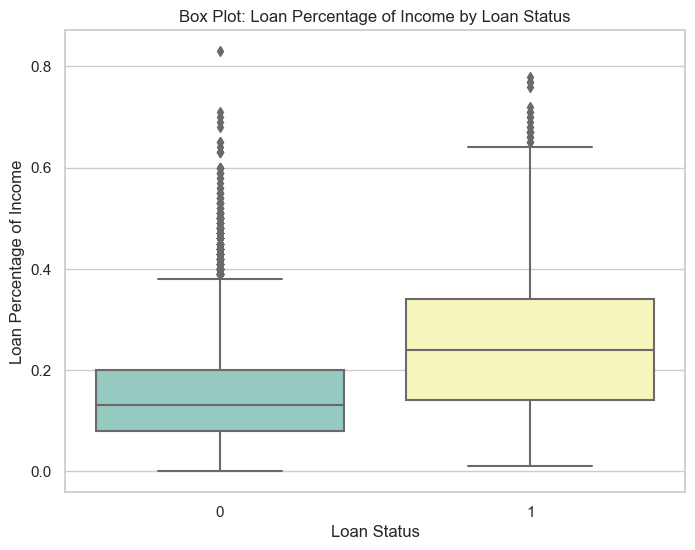

In [79]:
#Loan Percentage of Income by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x=raw_data['loan_status'], y=raw_data['loan_percent_income'], palette="Set3")
plt.xlabel('Loan Status')
plt.ylabel('Loan Percentage of Income')
plt.title('Box Plot: Loan Percentage of Income by Loan Status')
plt.show()

According to this graph, the average debt-to-income (loan_percent_income)  ratio is higher among clients in default compared to good clients. When the debt-to-income ratio is very high, it simply means that the amount of credit is too high relative to the person's income. And when a person has a credit amount that is excessively high compared to their income, the risk of defaulting on payments is logically and naturally significant.

Explanation:
- The debt-to-income ratio (loan_percent_income) indicates the proportion of a person's income that goes towards repaying debt. A higher ratio implies that a larger portion of the person's income is being used to service debt obligations.
- In the context of this analysis, clients in default are those who have failed to make payments according to their loan agreements, indicating financial distress or inability to manage their debt effectively.
- The observation that the debt-to-income ratio is higher among clients in default suggests that these individuals have taken on more debt relative to their income levels, potentially exceeding their capacity to repay.
- Therefore, a higher debt-to-income ratio increases the likelihood of default, as it indicates a greater financial burden on the individual and a higher risk of being unable to meet their debt obligations.

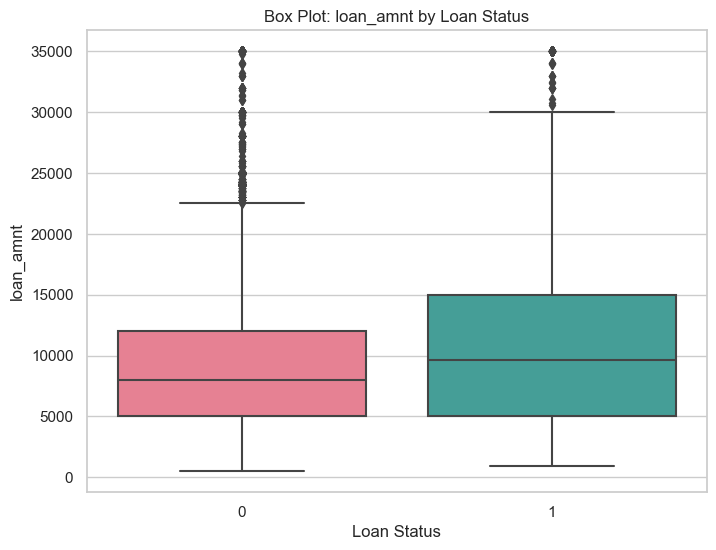

In [80]:
#loan_amnt of Income by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x=raw_data['loan_status'], y=raw_data['loan_amnt'], palette="husl")
plt.xlabel('Loan Status')
plt.ylabel('loan_amnt')
plt.title('Box Plot: loan_amnt by Loan Status')
plt.show()

Individuals who have defaulted on payments have a higher average loan amount compared to others.



In [81]:
# Filter data by loan status
default_loan = raw_data[raw_data['loan_status'] == 1]['loan_amnt']
non_default_loan = raw_data[raw_data['loan_status'] == 0]['loan_amnt']


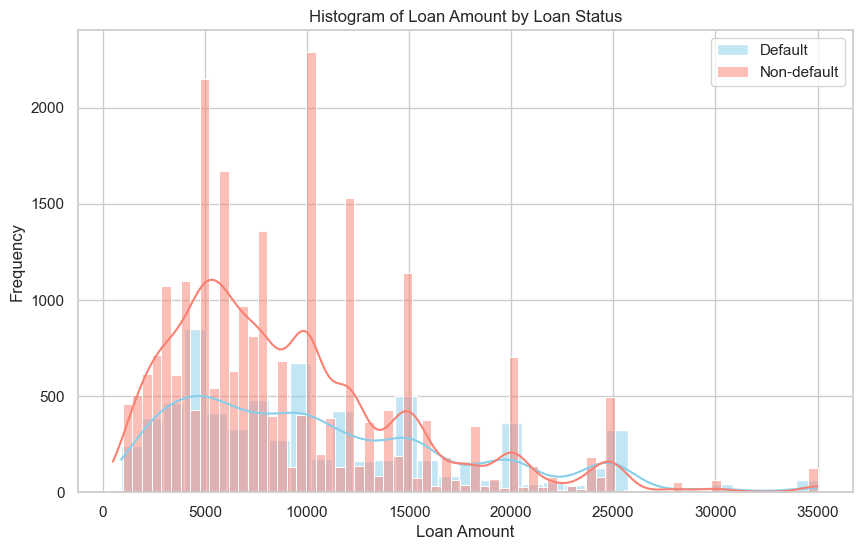

In [82]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(default_loan, color='skyblue', label='Default', kde=True)
sns.histplot(non_default_loan, color='salmon', label='Non-default', kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount by Loan Status')
plt.legend()
plt.show()

We observe, for example, that the bars representing very high loan amounts are longer among individuals in default compared to others. This indicates that there are many more individuals in default who have borrowed large amounts of money compared to individuals who are not in default.

In [83]:
raw_data.head()
raw_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [84]:
# Filter data by person_income
default_income = raw_data[raw_data['loan_status'] == 1]['person_income']
non_default_income = raw_data[raw_data['loan_status'] == 0]['person_income']


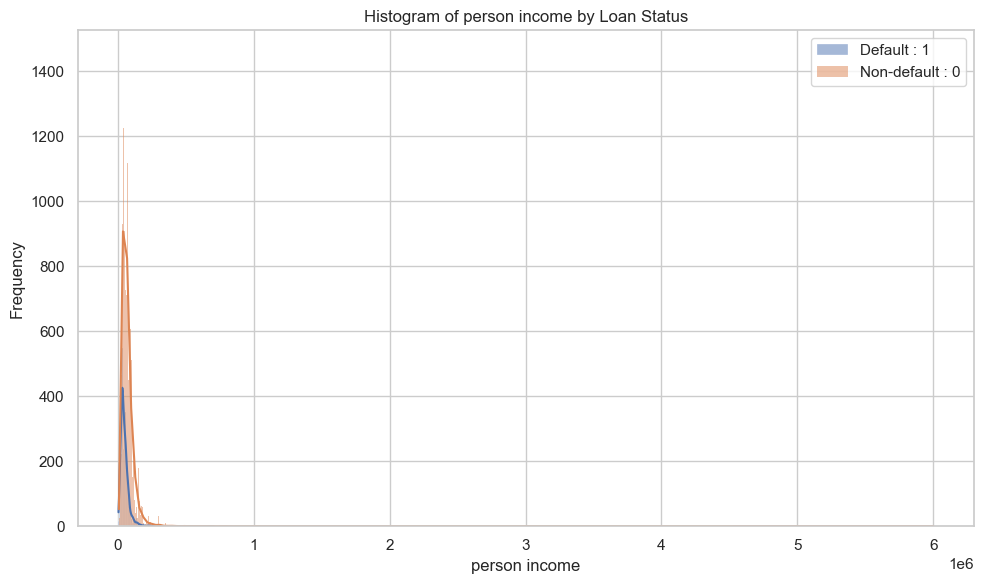

In [85]:
# Histogram of person income by Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(default_income,  label='Default : 1', kde=True)
sns.histplot(non_default_income,  label='Non-default : 0', kde=True)
plt.xlabel('person income')
plt.ylabel('Frequency')
plt.title('Histogram of person income by Loan Status')
plt.legend()
plt.tight_layout()
plt.show()

The variable 'person_income' as well as its histogram reveal the presence of outliers in this variable.

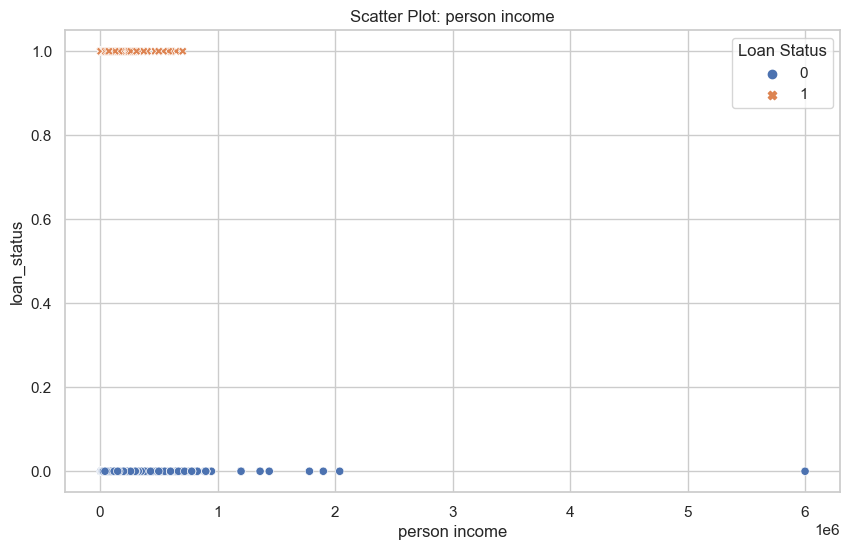

In [86]:
# scatter graphe of person income by Loan Status
#Scatter Plot: Loan Percentage of Income vs. Employment Length
# Set style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_data, x='person_income', y='loan_status', hue='loan_status', style='loan_status')
plt.title('Scatter Plot: person income')
plt.xlabel('person income')
plt.legend(title='Loan Status')
plt.show()

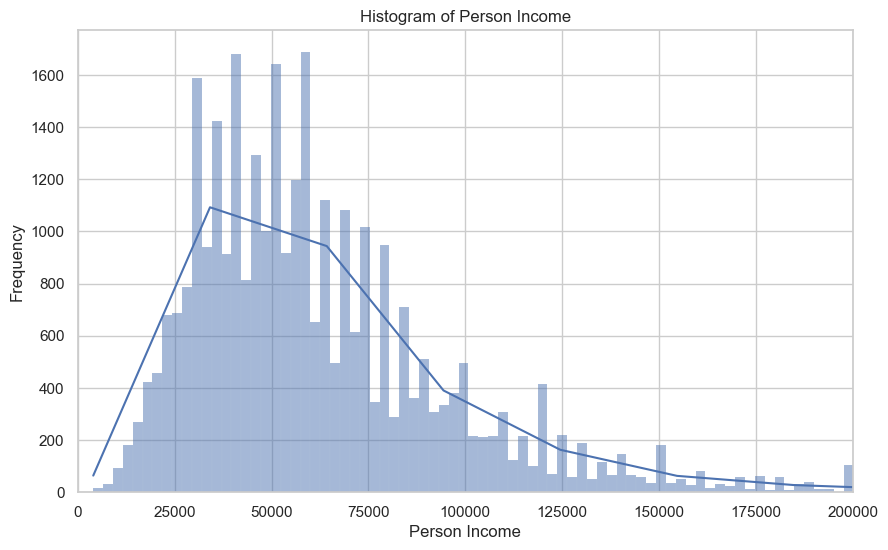

In [87]:
# Set style
sns.set(style="whitegrid")

# Create histogram of 'person_income'
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_data, x='person_income', kde=True)
plt.title('Histogram of Person Income')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.xlim(0, 200000) 
plt.show()

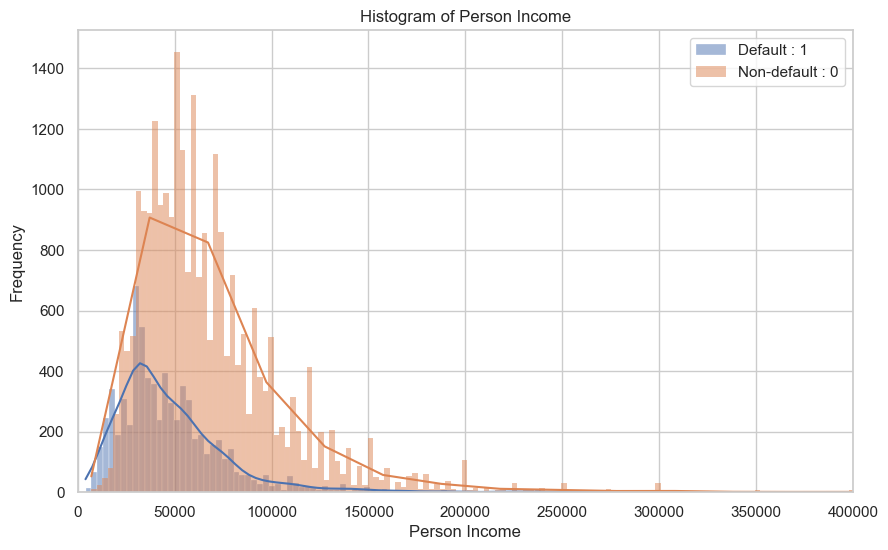

In [21]:
# Set style
sns.set(style="whitegrid")

# Create histogram of 'person_income'
plt.figure(figsize=(10, 6))
sns.histplot(default_income,  label='Default : 1', kde=True)
sns.histplot(non_default_income,  label='Non-default : 0', kde=True)
plt.title('Histogram of Person Income')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.legend()
#plt.xlim(0, 1000000) 
#plt.xlim(0, 500000) 
plt.xlim(0, 400000) 

plt.show()

**observetion:** The scatter plot above  confirms the presence of outliers in the variable indicating annual income. There is an enormous salary of 6 million dollars, while all other annual salaries do not exceed approximately 2 million dollars.


In [22]:
raw_data['person_income'].max()

6000000

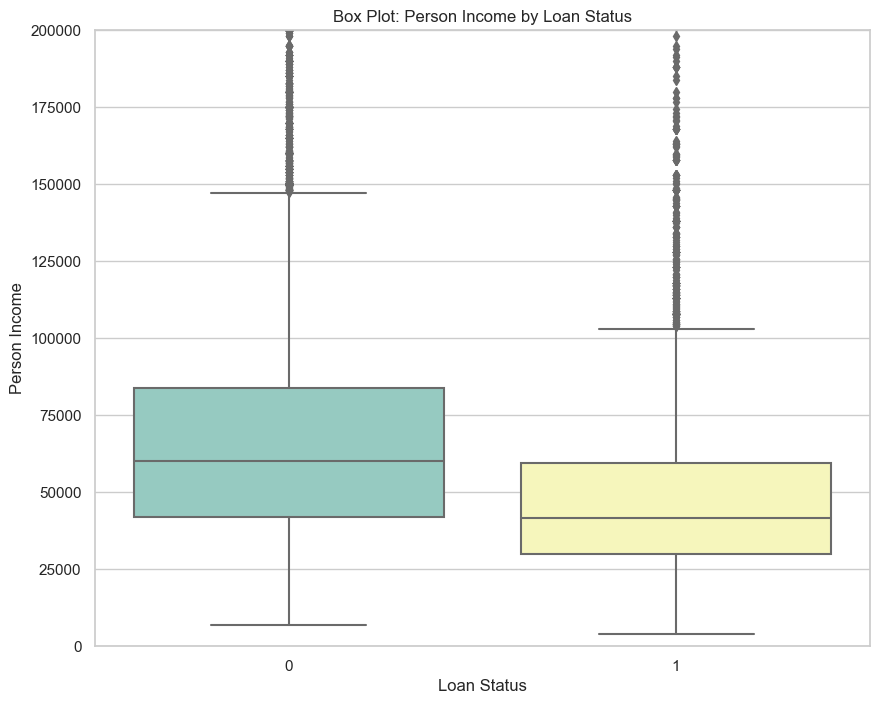

In [23]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(x=raw_data['loan_status'], y=raw_data['person_income'], palette="Set3")

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.title('Box Plot: Person Income by Loan Status')

# Set y-axis limits to focus on the main distribution
plt.ylim(0, 200000)  # Adjust the limits as needed

# Show the plot
plt.show()

Individuals who have defaulted on payments have, on average, an annual income lower than that of good clients.

In [24]:
# Filter data by loan_int_rate
default_loan_int_rate = raw_data[raw_data['loan_status'] == 1]['loan_int_rate']
# default = 0 equal good client
non_default_loan_int_rate = raw_data[raw_data['loan_status'] == 0]['loan_int_rate']


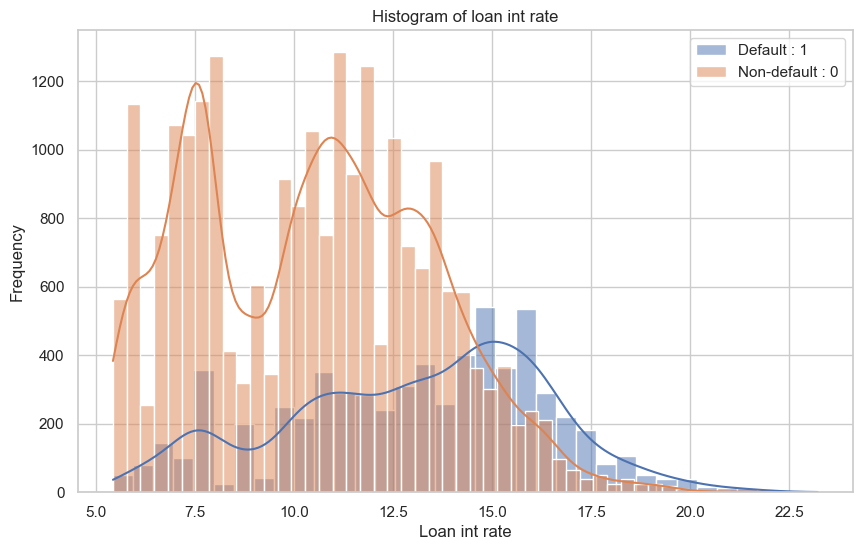

In [25]:
# Set style
sns.set(style="whitegrid")

# Create histogram of 'loan_int_rate'
plt.figure(figsize=(10, 6))
sns.histplot(default_loan_int_rate,  label='Default : 1', kde=True)
sns.histplot(non_default_loan_int_rate,  label='Non-default : 0', kde=True)
plt.title('Histogram of loan int rate')
plt.xlabel('Loan int rate')
plt.ylabel('Frequency')
plt.legend()

plt.show()

loan int rate are greater than  5%

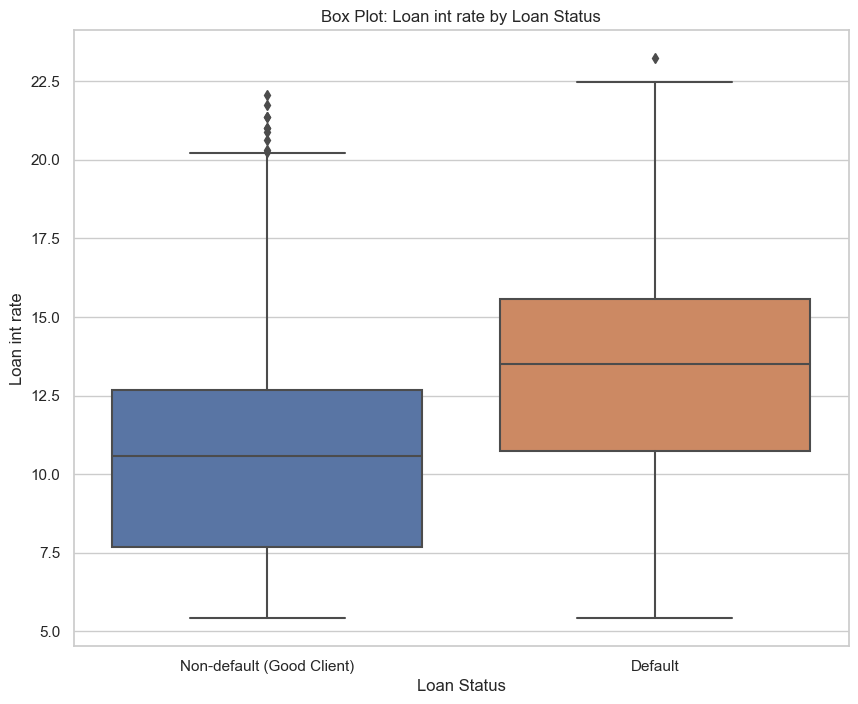

In [26]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(x=raw_data['loan_status'], y=raw_data['loan_int_rate'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan int rate')
plt.title('Box Plot: Loan int rate by Loan Status')
# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-default (Good Client)', 'Default'])

# Show the plot
plt.show()

Individuals in default have, on average, a higher interest rate than those who are not in default. 

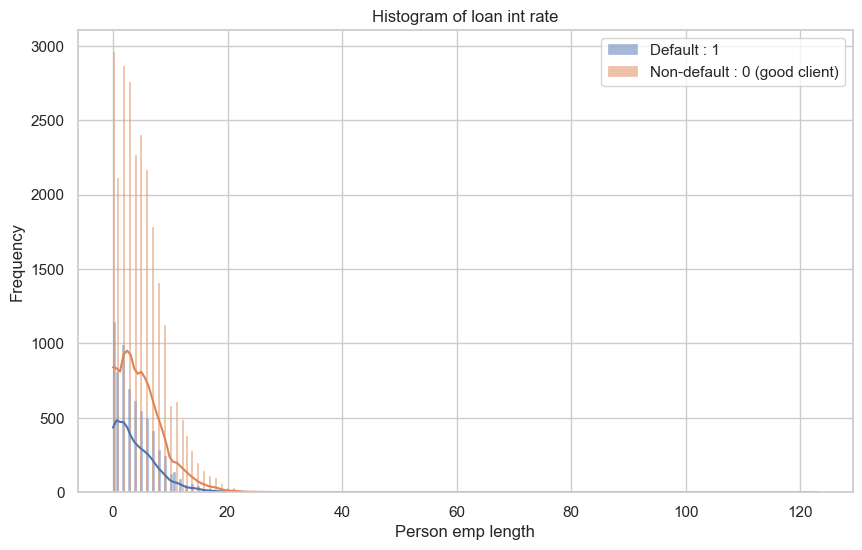

In [27]:
# Filter data by person_emp_length
default_person_emp_length = raw_data[raw_data['loan_status'] == 1]['person_emp_length']
# default = 0 equal good client
non_default_person_emp_length = raw_data[raw_data['loan_status'] == 0]['person_emp_length']
# Set style
sns.set(style="whitegrid")

# Create histogram of 'person_emp_length'
plt.figure(figsize=(10, 6))
sns.histplot(default_person_emp_length,  label='Default : 1', kde=True)
sns.histplot(non_default_person_emp_length,  label='Non-default : 0 (good client)', kde=True)
plt.title('Histogram of loan int rate')
plt.xlabel('Person emp length')
plt.ylabel('Frequency')
plt.legend()

plt.show()

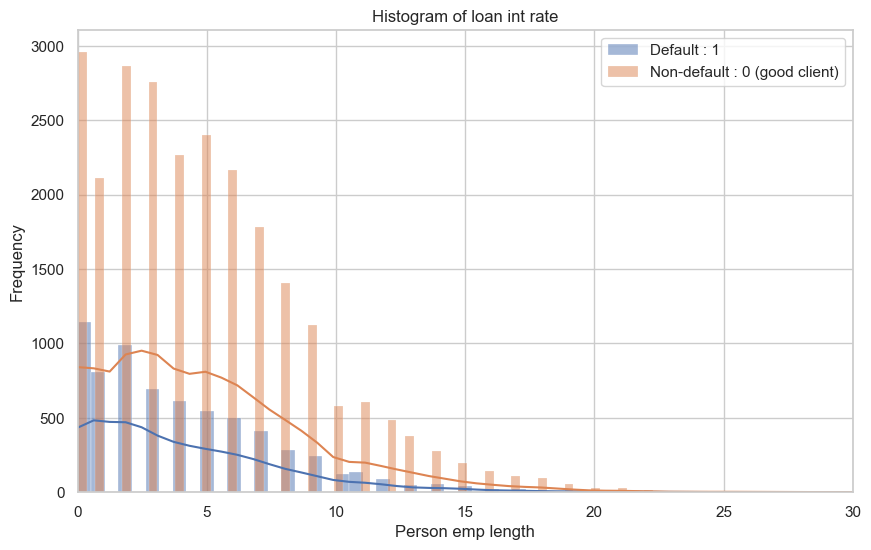

In [28]:
# Filter data by person_emp_length
default_person_emp_length = raw_data[raw_data['loan_status'] == 1]['person_emp_length']
# default = 0 equal good client
non_default_person_emp_length = raw_data[raw_data['loan_status'] == 0]['person_emp_length']
# Set style
sns.set(style="whitegrid")

# Create histogram of 'person_emp_length'
plt.figure(figsize=(10, 6))
sns.histplot(default_person_emp_length,  label='Default : 1', kde=True)
sns.histplot(non_default_person_emp_length,  label='Non-default : 0 (good client)', kde=True)
plt.title('Histogram of loan int rate')
plt.xlabel('Person emp length')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,30)
plt.show()

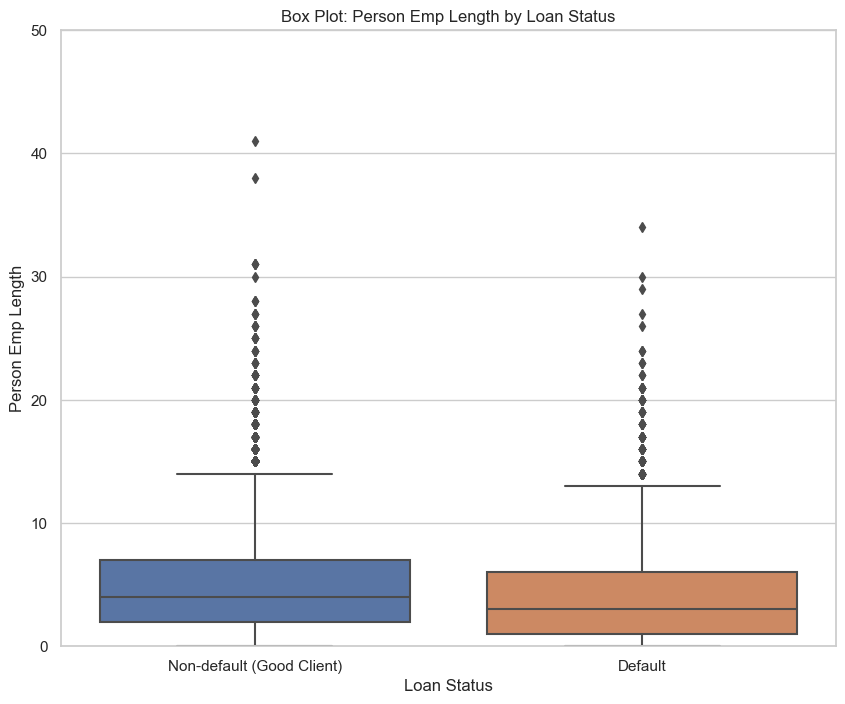

In [29]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(x=raw_data['loan_status'], y=raw_data['person_emp_length'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Person Emp Length')
plt.title('Box Plot: Person Emp Length by Loan Status')
# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-default (Good Client)', 'Default'])
# Set y-axis limits to focus on the main distribution
plt.ylim(0, 50)  # Adjust the limits as needed

# Show the plot
plt.show()

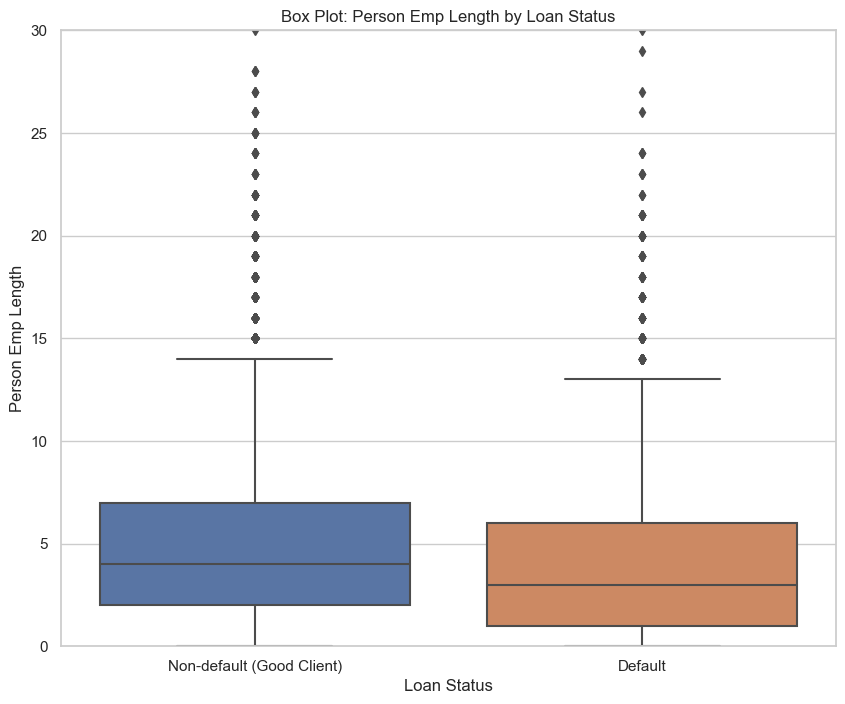

In [30]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(x=raw_data['loan_status'], y=raw_data['person_emp_length'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Person Emp Length')
plt.title('Box Plot: Person Emp Length by Loan Status')
# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-default (Good Client)', 'Default'])
# Set y-axis limits to focus on the main distribution
plt.ylim(0, 30)  # Adjust the limits as needed

# Show the plot
plt.show()

**observations:** individuals in default have, on average, a shorter duration of employment than others.

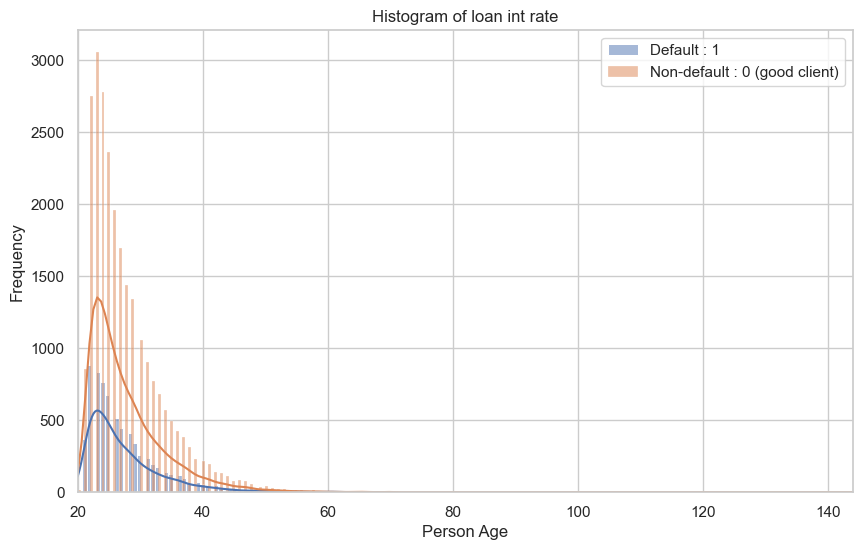

In [31]:
# Filter data by person_age
default_person_age = raw_data[raw_data['loan_status'] == 1]['person_age']
# default = 0 equal good client
non_default_person_age = raw_data[raw_data['loan_status'] == 0]['person_age']
# Set style
sns.set(style="whitegrid")

# Create histogram of 'person_age'
plt.figure(figsize=(10, 6))
sns.histplot(default_person_age,  label='Default : 1', kde=True)
sns.histplot(non_default_person_age,  label='Non-default : 0 (good client)', kde=True)
plt.title('Histogram of loan int rate')
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(20,144)
plt.show()

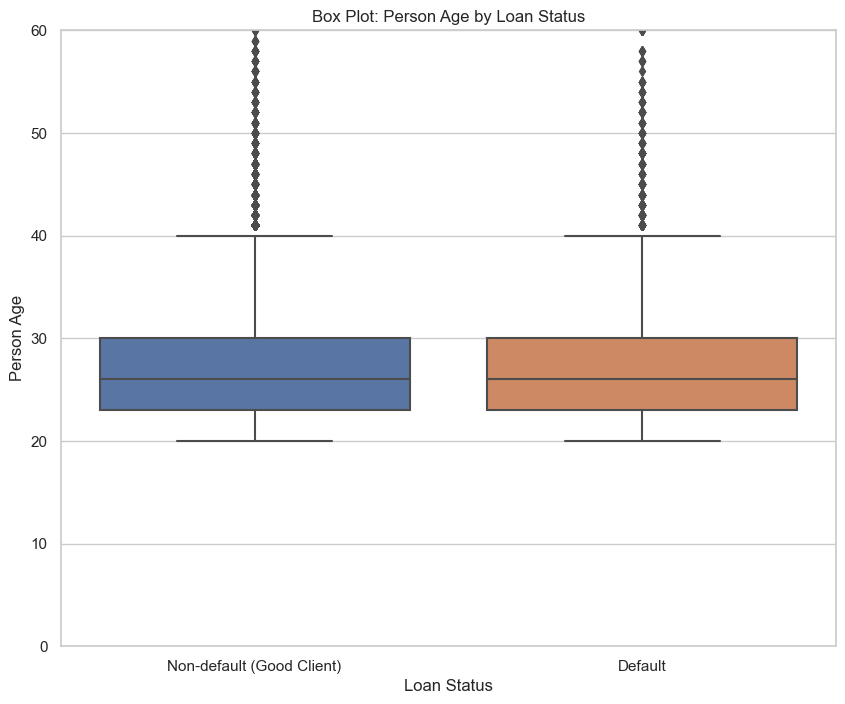

In [32]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the box plot
sns.boxplot(x=raw_data['loan_status'], y=raw_data['person_age'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Person Age')
plt.title('Box Plot: Person Age by Loan Status')
# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-default (Good Client)', 'Default'])
# Set y-axis limits to focus on the main distribution
plt.ylim(0, 60)  # Adjust the limits as needed

# Show the plot
plt.show()

The age has no influence on whether a credit is repaid or not.

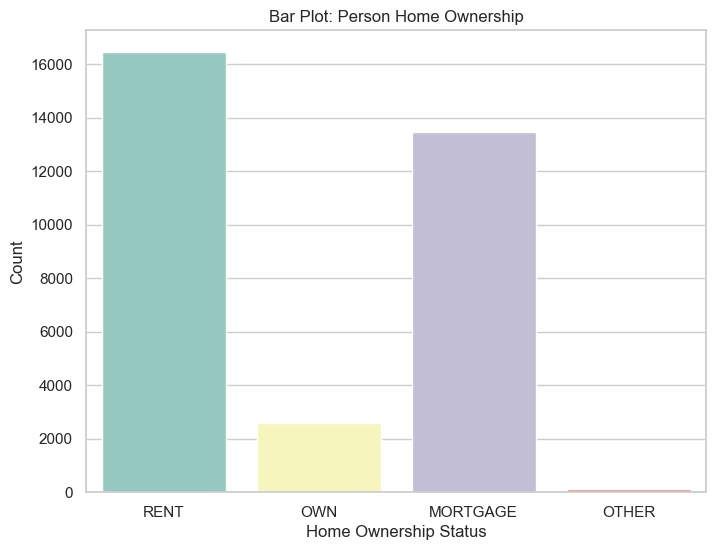

In [33]:
# bar plot for Person Home Ownership
plt.figure(figsize=(8, 6))
sns.countplot(data=raw_data, x='person_home_ownership', palette='Set3')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.title('Bar Plot: Person Home Ownership')
plt.show()

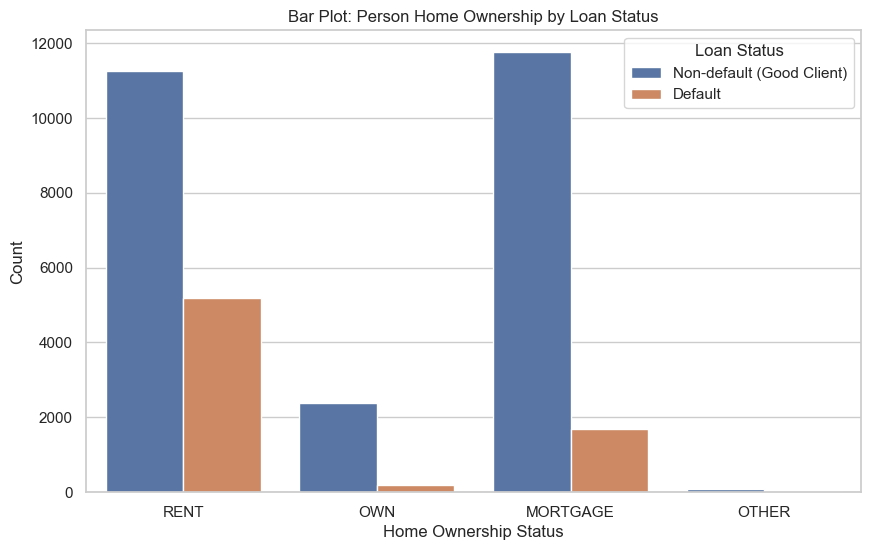

In [34]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_data, x='person_home_ownership', hue='loan_status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.title('Bar Plot: Person Home Ownership by Loan Status')
plt.legend(title='Loan Status', labels=['Non-default (Good Client)', 'Default'])
plt.show()

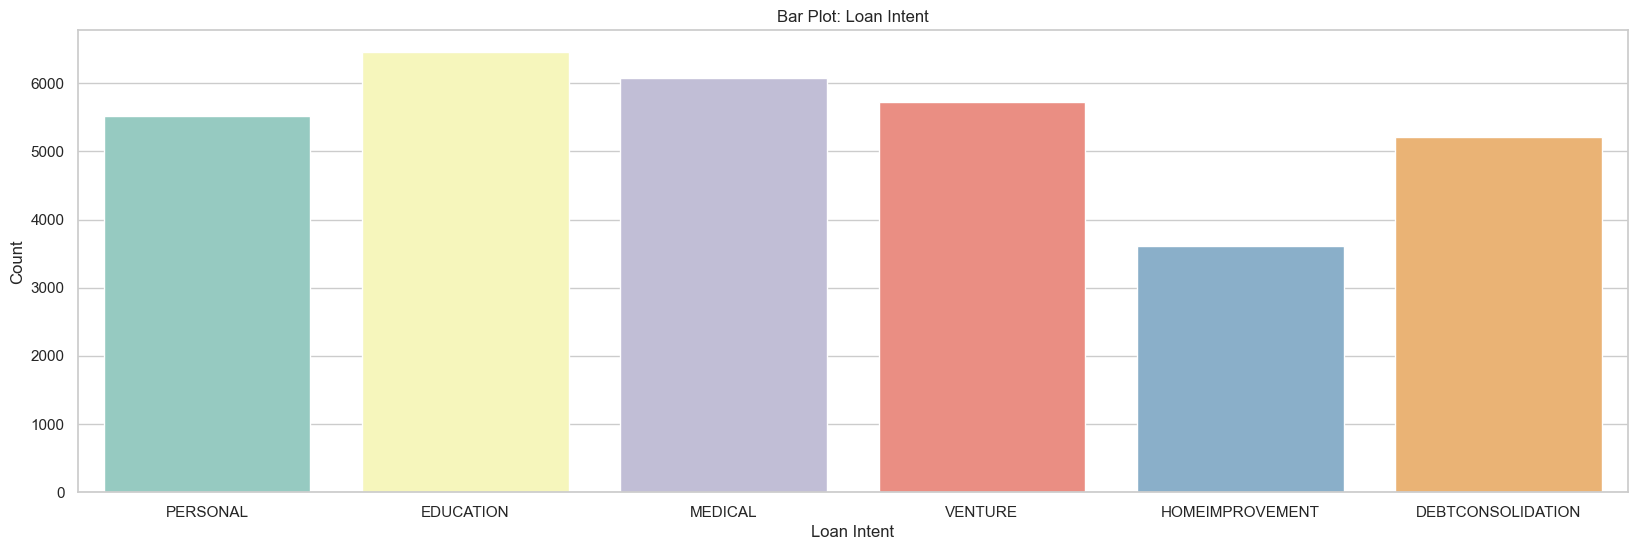

In [35]:
# bar plot for 'loan_intent'
plt.figure(figsize=(20, 6))
sns.countplot(data=raw_data, x='loan_intent', palette='Set3')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Bar Plot: Loan Intent')


plt.show()

In [36]:
raw_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

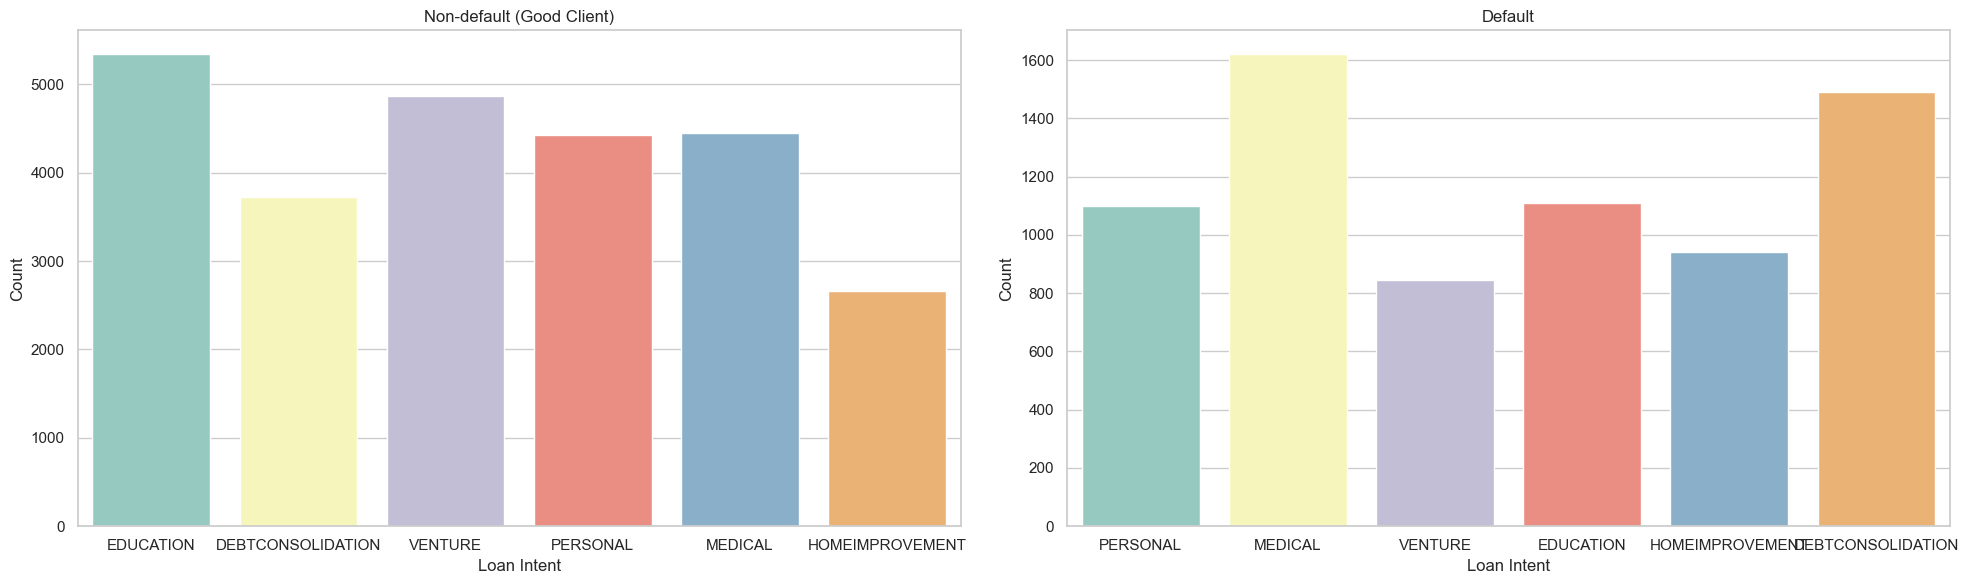

In [37]:
# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Subplot for loan_status = 0 (non-default good client)
sns.countplot(data=raw_data[raw_data['loan_status'] == 0], x='loan_intent', palette='Set3', ax=axes[0])
axes[0].set_xlabel('Loan Intent')
axes[0].set_ylabel('Count')
axes[0].set_title('Non-default (Good Client)')

# Subplot for loan_status = 1 (default)
sns.countplot(data=raw_data[raw_data['loan_status'] == 1], x='loan_intent', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Loan Intent')
axes[1].set_ylabel('Count')
axes[1].set_title('Default')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

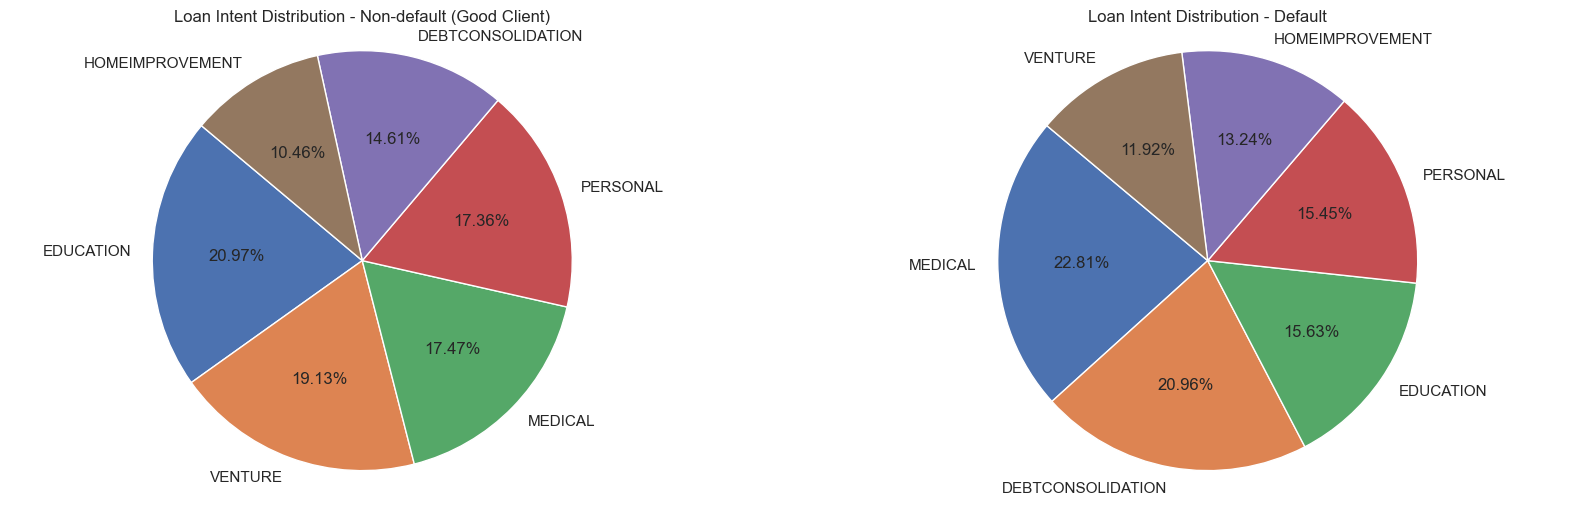

In [38]:
# Filter data for loan_status = 0 (non-default good client)
non_default_data_loan_intent = raw_data[raw_data['loan_status'] == 0]['loan_intent'].value_counts()

# Filter data for loan_status = 1 (default)
default_data_loan_intent = raw_data[raw_data['loan_status'] == 1]['loan_intent'].value_counts()

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Pie chart for loan_status = 0 (non-default good client)
axes[0].pie(non_default_data_loan_intent, labels=non_default_data_loan_intent.index, autopct='%1.2f%%', startangle=140)
axes[0].set_title('Loan Intent Distribution - Non-default (Good Client)')

# Pie chart for loan_status = 1 (default)
axes[1].pie(default_data_loan_intent, labels=default_data_loan_intent.index, autopct='%1.2f%%', startangle=140)
axes[1].set_title('Loan Intent Distribution - Default')

# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis('equal')
axes[1].axis('equal')

# Show the plot
plt.show()

In [39]:
raw_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [88]:
# Numerical columns
numerical_cols = raw_data.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_cols = raw_data.select_dtypes(include=['object']).columns


In [89]:
raw_data[numerical_cols].corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<Axes: >

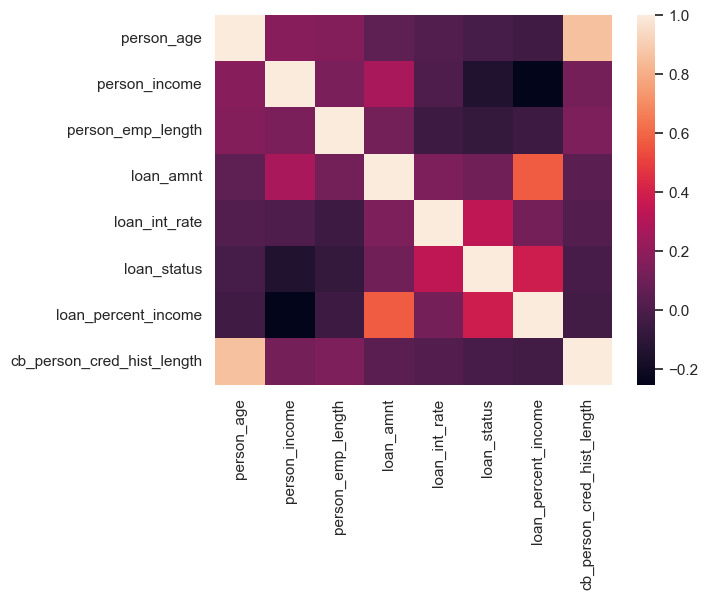

In [90]:
sns.heatmap(raw_data[numerical_cols].corr())

## Data Preprocessing

In [140]:
df_clean = raw_data

In [128]:
df_clean.shape

(32581, 12)

In [129]:
df_clean.isnull().sum()/df_clean.shape[0]

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

## ***Outliers***

During EDA, we observed the presence of outliers. These outliers can affect the quality of a Machine Learning model. Therefore, we need to address them. Before addressing the outliers, we first need to detect them.

There are several methods for detecting outliers. According to the Interquartile Range (IQR) method, a value is considered an outlier if it satisfies one of the following conditions:
- If the value is less than $Q_1 - 1.5 \times IQR$
- If the value is greater than $Q_3 + 1.5 \times IQR$

Here, $IQR$ is the Interquartile Range, calculated as $IQR = Q_3 - Q_1$, where $Q_1$ is the first quartile and $Q_3$ is the third quartile.

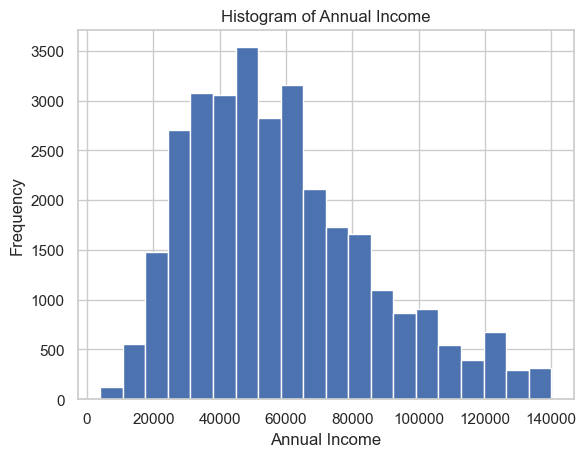

In [141]:
# Identification of outliers for 'person_income'
Q1 = df_clean['person_income'].quantile(0.25)
Q3 = df_clean['person_income'].quantile(0.75)
IQR = Q3 - Q1
index_outlier_income = df_clean[(df_clean['person_income'] < Q1 - 1.5 * IQR) | (df_clean['person_income'] > Q3 + 1.5 * IQR)].index

# Removal of outliers for 'person_income'
df_clean = df_clean.drop(index_outlier_income)

# Verification: Histogram of annual income
plt.hist(df_clean['person_income'], bins=20)
plt.title("Histogram of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

In [142]:
# Remove outliers for 'person_age'
df_clean = df_clean[df_clean['person_age'] < 100]

# Display the first few rows to verify the changes
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [115]:
df_clean.shape

(31095, 12)

## Missing Values


There are two main techniques for handling missing values:

* **Deletion:** Removing rows containing missing values.
* **Imputation:** Replacing missing values by the mean, median, etc., of the variable containing these missing values.
There are also other more sophisticated imputation methods such as the k-nearest neighbors method (KNN).



In [143]:
# Identify missing values for 'person_emp_length'
index_NA_person_emp_length = df_clean['person_emp_length'].isna()

# Calculate the median of 'person_emp_length' excluding missing values
median_person_emp_length = df_clean['person_emp_length'].median()

# Replace missing values in 'person_emp_length' with the calculated median
df_clean.loc[index_NA_person_emp_length, 'person_emp_length'] = median_person_emp_length

# Identify missing values for 'loan_int_rate'
index_NA_rate = df_clean['loan_int_rate'].isna()

# Calculate the median of 'loan_int_rate' excluding missing values
median_loan_int_rate = df_clean['loan_int_rate'].median()

# Replace missing values in 'loan_int_rate' with the calculated median
df_clean.loc[index_NA_rate, 'loan_int_rate'] = median_loan_int_rate


In [144]:
# Summary for 'person_emp_length'
df_clean['person_emp_length'].describe()

count    31095.000000
mean         4.688085
std          3.960755
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [118]:
# Summary for 'loan_int_rate'
df_clean['loan_int_rate'].describe()

count    31095.000000
mean        10.995480
std          3.077697
min          5.420000
25%          8.490000
50%         10.990000
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [145]:
df_clean.head() 


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Normalization of numerical variables

In [146]:
from sklearn.preprocessing import MinMaxScaler


In [147]:
# use MinMaxScaler
numerical_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_clean[numerical_col] = scaler.fit_transform(df_clean[numerical_col])

# Display the first few rows to verify the transformation
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.027027,0.404400,RENT,1.000000,PERSONAL,D,1.000000,0.595506,1,0.707317,Y,0.035714
1,0.013514,0.041175,OWN,0.040650,EDUCATION,B,0.014493,0.321348,0,0.109756,N,0.000000
2,0.067568,0.041175,MORTGAGE,0.008130,MEDICAL,C,0.144928,0.418539,1,0.682927,N,0.035714
3,0.040541,0.452193,RENT,0.032520,MEDICAL,C,1.000000,0.551124,1,0.634146,N,0.000000
4,0.054054,0.370577,RENT,0.065041,MEDICAL,C,1.000000,0.497191,1,0.658537,Y,0.071429


In [103]:
categorical_cols = []
for col in df_clean.select_dtypes('object'):
    print(f'{col}  ---- {df_clean[col].unique()}')
    categorical_cols.append(col)


person_home_ownership  ---- ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent  ---- ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade  ---- ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file  ---- ['Y' 'N']


In [149]:
df_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [178]:
# Initialize LabelEncoder for 'loan_grade'
label_encoder = LabelEncoder()

# Fit and transform 'loan_grade'
df_clean['loan_grade'] = label_encoder.fit_transform(df_clean['loan_grade'])


In [180]:
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.027027,0.404400,RENT,1.000000,PERSONAL,3,1.000000,0.595506,1,0.707317,Y,0.035714
1,0.013514,0.041175,OWN,0.040650,EDUCATION,1,0.014493,0.321348,0,0.109756,N,0.000000
2,0.067568,0.041175,MORTGAGE,0.008130,MEDICAL,2,0.144928,0.418539,1,0.682927,N,0.035714
3,0.040541,0.452193,RENT,0.032520,MEDICAL,2,1.000000,0.551124,1,0.634146,N,0.000000
4,0.054054,0.370577,RENT,0.065041,MEDICAL,2,1.000000,0.497191,1,0.658537,Y,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,0.432432,0.444840,RENT,0.000000,EDUCATION,1,0.130435,0.328090,0,0.085366,N,0.642857
32576,0.500000,0.360284,MORTGAGE,0.008130,PERSONAL,2,0.153623,0.434831,0,0.121951,N,1.000000
32577,0.459459,0.852916,MORTGAGE,0.032520,PERSONAL,0,0.496377,0.116292,0,0.170732,N,0.607143
32578,0.608108,0.529396,RENT,0.024390,HOMEIMPROVEMENT,1,1.000000,0.312921,1,0.548780,N,0.928571


In [181]:
df_clean.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [189]:
df_clean2 = df_clean

In [190]:
from sklearn.impute import SimpleImputer


# Define categorical columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

# Impute missing values in categorical columns with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df_clean2[categorical_cols] = imputer.fit_transform(df_clean2[categorical_cols])

# Apply one-hot encoding
onehot_encoder = OneHotEncoder(drop='first')
onehot_encoded_data = onehot_encoder.fit_transform(df_clean2[categorical_cols])

# Convert one-hot encoded data to DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate one-hot encoded DataFrame with the original DataFrame
df_clean_encoded = pd.concat([df_clean2.reset_index(drop=True), onehot_encoded_df.reset_index(drop=True)], axis=1)


In [186]:
df_clean_encoded.isna().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
dtype: int64

In [192]:
df_clean2.isna().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [193]:
df_clean3 = df_clean_encoded.drop(columns='person_home_ownership')
df_clean3.isna().sum()


person_age                     0
person_income                  0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
dtype: int64

In [194]:
df_clean4 = df_clean3.drop(columns='loan_intent')
df_clean4.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
dtype: int64

In [195]:
df_clean4.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.027027,0.404400,1.000000,3,1.000000,0.595506,1,0.707317,Y,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.013514,0.041175,0.040650,1,0.014493,0.321348,0,0.109756,N,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.067568,0.041175,0.008130,2,0.144928,0.418539,1,0.682927,N,0.035714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.040541,0.452193,0.032520,2,1.000000,0.551124,1,0.634146,N,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.054054,0.370577,0.065041,2,1.000000,0.497191,1,0.658537,Y,0.071429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [201]:
df_clean4 = df_clean4.drop(columns='cb_person_default_on_file')

df_clean4.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.027027,0.404400,1.000000,3,1.000000,0.595506,1,0.707317,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.013514,0.041175,0.040650,1,0.014493,0.321348,0,0.109756,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.067568,0.041175,0.008130,2,0.144928,0.418539,1,0.682927,0.035714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.040541,0.452193,0.032520,2,1.000000,0.551124,1,0.634146,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.054054,0.370577,0.065041,2,1.000000,0.497191,1,0.658537,0.071429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Training and Test Data


In [202]:
from sklearn.model_selection import train_test_split



# Define features and target variable
X = df_clean4.drop(columns=['loan_status'],axis=0)
y = df_clean4['loan_status']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (24876, 17)
Test set shape: (6219, 17)


In [203]:
y_train.value_counts()/X_train.shape[0]

loan_status
0    0.774723
1    0.225277
Name: count, dtype: float64

In [204]:
y_test.value_counts()/X_test.shape[0]

loan_status
0    0.781476
1    0.218524
Name: count, dtype: float64

<Axes: ylabel='count'>

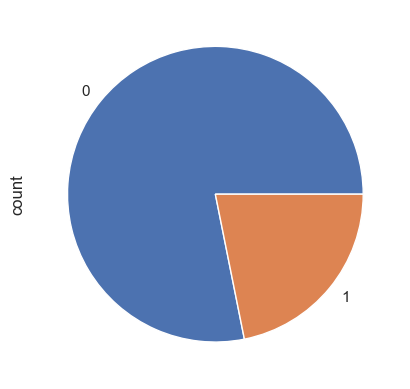

In [205]:
y_test.value_counts().plot.pie()

# Modeling

## Logistic Regression


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4860
           1       0.74      0.53      0.62      1359

    accuracy                           0.86      6219
   macro avg       0.81      0.74      0.77      6219
weighted avg       0.85      0.86      0.85      6219



## Random Forest Classifier


In [207]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4860
           1       0.96      0.73      0.83      1359

    accuracy                           0.93      6219
   macro avg       0.94      0.86      0.89      6219
weighted avg       0.94      0.93      0.93      6219



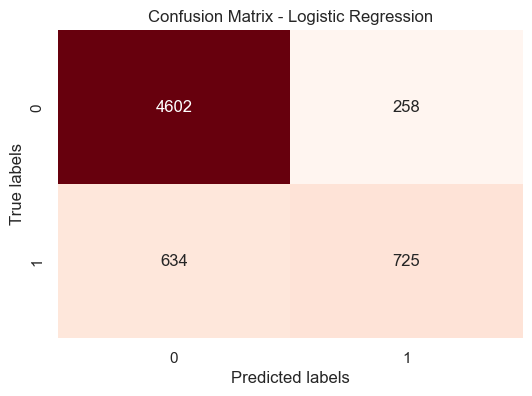

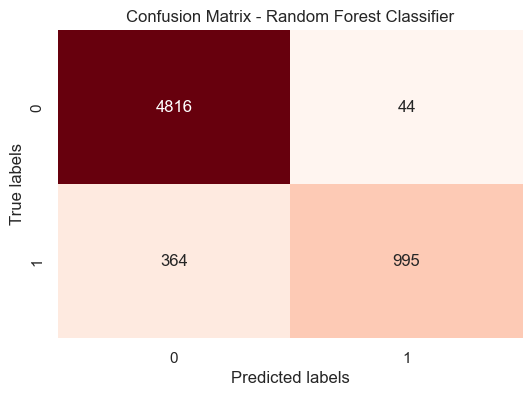

In [208]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')

# Plot confusion matrix for Random Forest Classifier model
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Classifier')